<a href="https://colab.research.google.com/github/rhdmsggg/Colab_machine_learning/blob/main/02_1_%ED%9B%88%EB%A0%A8_%EC%84%B8%ED%8A%B8%EC%99%80_%ED%85%8C%EC%8A%A4%ED%8A%B8_%EC%84%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#지도 학습과 비지도 학습

머신러닝 알고리즘은 크게 지도 학습과 비지도 학습으로 나눌 수 있다.

지도 학습에서는 데이터와 정답을 입력과 타깃이라고 하고, 이 둘을 합쳐 훈련 데이터라고 부른다.

입력으로 사용된 길이와 무게를 특성이라고 한다.

In [62]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [63]:
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [64]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [65]:
print(fish_data[4])

[29.0, 430.0]


In [66]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [67]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [68]:
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


#훈련 세트와 테스트 세트

테스트 세트 : 평가에 사용하는 데이터

훈련 세트 : 훈련에 사용되는 데이터

머신러닝의 정확한 평가를 위해서는 테스트 세트와 훈련 세트가 따로 준비되어야 한다.

In [71]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]
# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]
# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]
# 테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

In [72]:
kn = kn.fit(train_input, train_target)

kn.score(test_input, test_target)   #결과값 = 0.0

0.0

# 샘플링 편향

일반적으로 훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않으면 샘플링이 한쪽으로 치우쳤다는 의미로 샘플링 편향이라고 부른다.


#넘파이

파이썬의 대표적인 배열 라이브러리

In [32]:
import numpy as np

In [ ]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)

In [38]:
print(input_arr.shape)    # 이 명령을 사용하면 (샘플 수, 특성 수)를 출력 한다

(49, 2)


#데이터 섞기

In [42]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [44]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [48]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [50]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

2차원 배열은 행과 열 인덱스를 콤마로 나누어 지정한다. 

슬라이싱 연산자로 처음부터 마지막 원소까지 모두 선택하는 경우 시작과 종료 인덱스를 모두 생략할 수 있다.

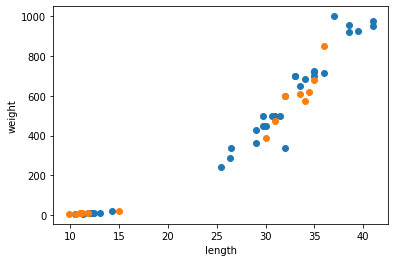

In [51]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

파란색이 훈련 세트이고 주황색이 테스트 세트 이다. 양쪽에 도미와 빙어가 모두 섞여 있다.

#두 번째 머신러닝 프로그램

In [53]:
kn = kn.fit(train_input, train_target)

kn.score(test_input, test_target)

1.0

In [56]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [57]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])